<a href="https://colab.research.google.com/github/Divya1229/ML/blob/main/Unsupervised_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

Reading Data

In [4]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Plotting raw data

Text(0, 0.5, 'Sepal Length(cm)')

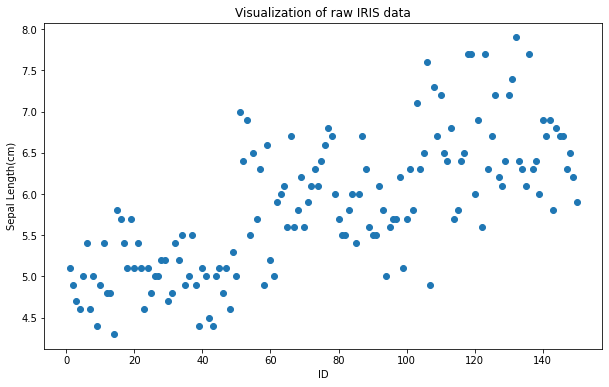

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_data.iloc[:, 0], iris_data.iloc[:, 1])
plt.title('Visualization of raw IRIS data');
plt.xlabel("ID")
plt.ylabel("Sepal Length(cm)")

Visualising data

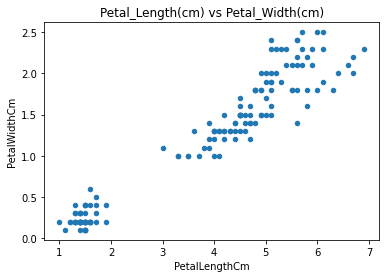

In [8]:
iris_data.plot(kind = 'scatter',x='PetalLengthCm',y='PetalWidthCm',title = 'Petal_Length(cm) vs Petal_Width(cm)')


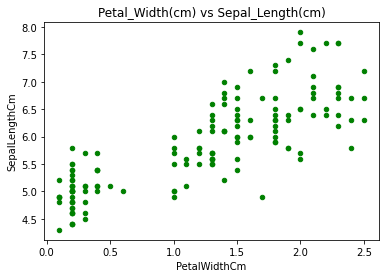

In [9]:
iris_data.plot(kind = 'scatter',x='PetalWidthCm',y='SepalLengthCm',title = 'Petal_Width(cm) vs Sepal_Length(cm)',c="green")


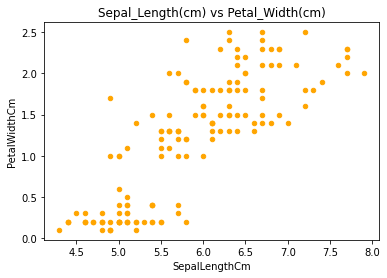

In [10]:
iris_data.plot(kind = 'scatter',x='SepalLengthCm',y='PetalWidthCm',title = 'Sepal_Length(cm) vs Petal_Width(cm)', c="orange")


Clustering - using elbow method to find optimum number of clusters

In [11]:
iris_data.drop('Species',axis=1, inplace = True)


In [13]:
Dt = []

for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(iris_data)       # fitting the data
    Dt.append(sum(np.min(cdist(iris_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / iris_data.shape[0])


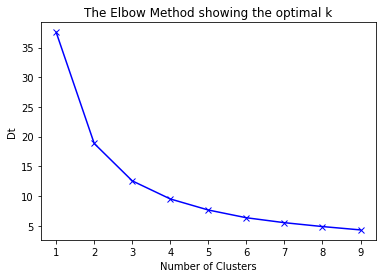

In [14]:
plt.plot(range(1, 10), Dt,"bx-")
plt.xlabel('Number of Clusters')
plt.ylabel('Dt')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [15]:
X_std = StandardScaler().fit_transform(iris_data)


K-means Implementation

In [16]:
kmean = KMeans(n_clusters=3, max_iter=100)

kmean.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Plotting Clustered Data

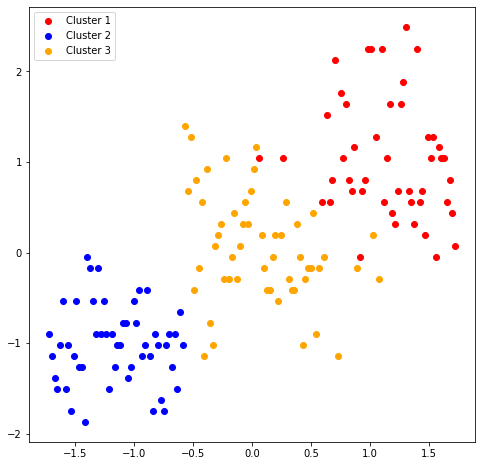

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(X_std[kmean.labels_ == 0, 0], X_std[kmean.labels_ == 0, 1],
            c='red', label='Cluster 1')

plt.scatter(X_std[kmean.labels_ == 1, 0], X_std[kmean.labels_ == 1, 1],
            c='blue', label='Cluster 2')

plt.scatter(X_std[kmean.labels_ == 2, 0], X_std[kmean.labels_ == 2, 1],
            c='orange', label='Cluster 3')

plt.legend()